# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

$$
\nabla Q(w) = \dfrac{2}{\ell} X^T (Xw-y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
# !pip install numpy --upgrade

In [2]:
# %autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
ind = np.random.randint(low=0, high=y.shape[0], size=50)

In [7]:
# Descents
from descents import get_descent
from linear_regression import LinearRegression

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    print(f'{descent_name}: in process')
    
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'
    
    print(f'{descent_name}: pass')

full: in process
full: pass
stochastic: in process
stochastic: pass
momentum: in process
momentum: pass
adam: in process
adam: pass


In [ ]:
gradient

In [9]:
# LinearRegression

max_iter = 10
tolerance = 0
for descent in ['full', 'stochastic', 'momentum', 'adam',]: # , 'full', 'momentum', 'adam'
    descent_config = {
        'descent_name': descent,
        'kwargs': {
            'dimension': dimension,
    #         'batch_size': 10
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter
    )

    regression.fit(x, y)

    assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'
    print(f'{descent}: pass')

full: pass
stochastic: pass
momentum: pass
adam: pass


In [ ]:
regression.descent.__dict__['loss_function']

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [2]:
data = pd.read_csv('autos.csv')

In [3]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [13]:
data.shape

(241190, 10)

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

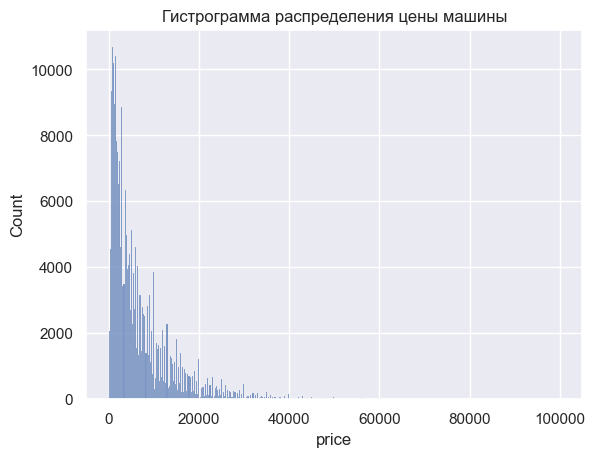

In [8]:
sns.histplot(data['price'])
plt.title('Гистрограмма распределения цены машины')
plt.show()

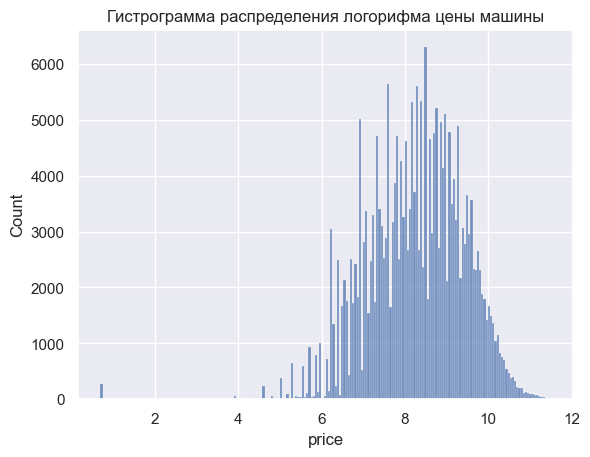

In [9]:
sns.histplot(np.log1p(data['price']))
plt.title('Гистрограмма распределения логорифма цены машины')
plt.show()

<AxesSubplot: >

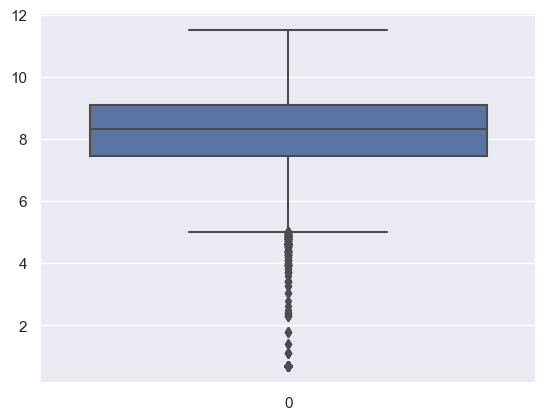

In [10]:
sns.boxplot(np.log1p(data['price']))

По гистограмме видно, что есть выбросы в данных - аномально низкие цены, избавимся от них

In [11]:
data['log_price'] = np.log1p(data.price)
data = data[data['log_price'] > 5]
data.shape

(240411, 12)

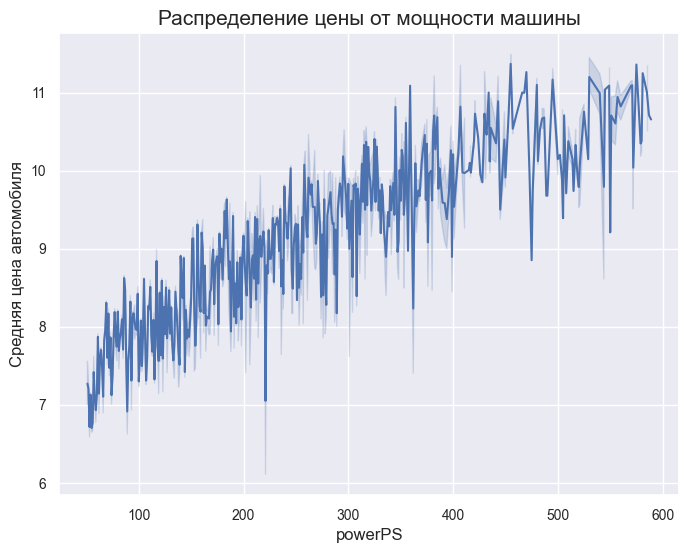

In [12]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=data.powerPS, y=data.log_price)

plt.title('Распределение цены от мощности машины', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Средняя цена автомобиля', fontsize=12)
plt.xlabel('powerPS', fontsize=12)
plt.show()

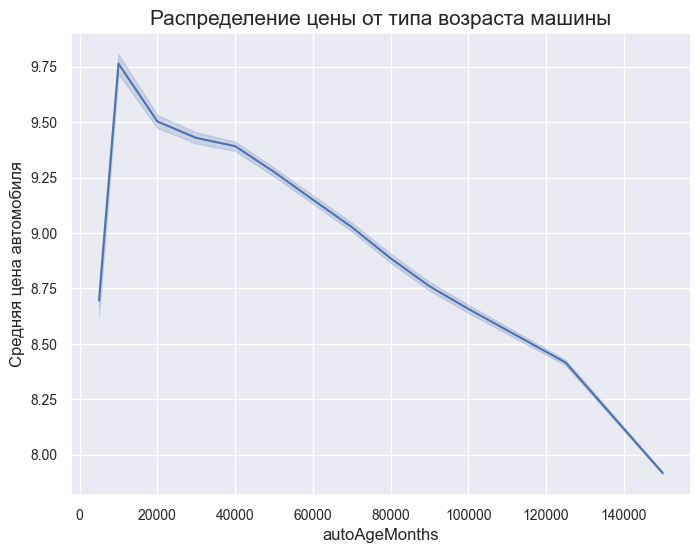

In [19]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=data.kilometer, y=data.log_price)

plt.title('Распределение цены от типа возраста машины', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Средняя цена автомобиля', fontsize=12)
plt.xlabel('autoAgeMonths', fontsize=12)
plt.show()

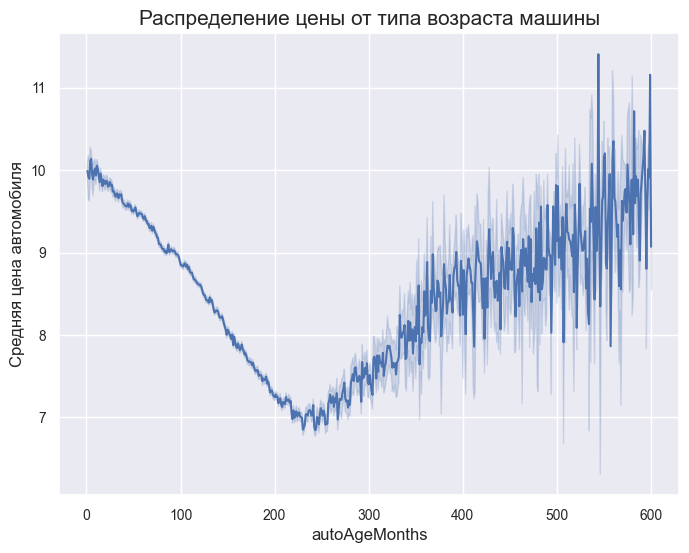

In [13]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=data.autoAgeMonths, y=data.log_price)

plt.title('Распределение цены от типа возраста машины', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Средняя цена автомобиля', fontsize=12)
plt.xlabel('autoAgeMonths', fontsize=12)
plt.show()

In [21]:
data['rare'] = 0
data['transformed_age'] = data['autoAgeMonths'].copy()

data.loc[(data['transformed_age'] > 250) & (data['transformed_age'] <= 300), 'rare'] = 1
data.loc[(data['transformed_age'] > 250) & (data['transformed_age'] <= 300), 'transformed_age'] = 180

data.loc[(data['transformed_age'] > 300), 'rare'] = 2
data.loc[(data['transformed_age'] > 300), 'transformed_age'] = 130

C:\Users\HP\AppData\Local\Temp\ipykernel_12136\3298990385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rare'] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_12136\3298990385.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_age'] = data['autoAgeMonths'].copy()


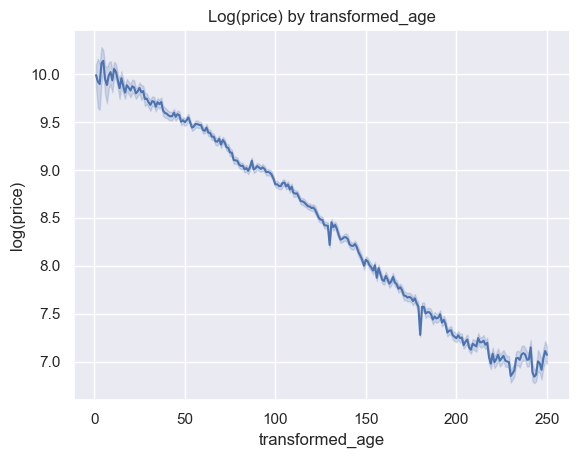

In [25]:
sns.lineplot(x=data['transformed_age'], y=data['log_price'])

plt.title('Log(price) by transformed_age')
plt.xlabel('transformed_age')
plt.ylabel('log(price)')

plt.show()

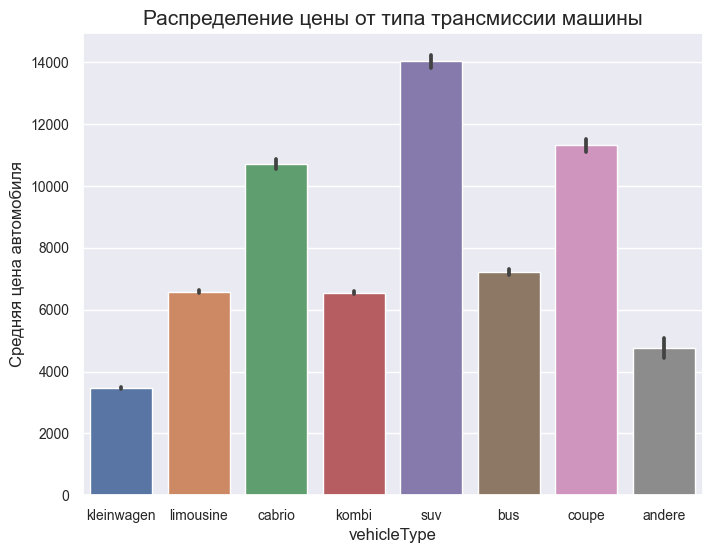

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data.vehicleType, y=data.price)

plt.title('Распределение цены от типа трансмисcии машины', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Средняя цена автомобиля', fontsize=12)
plt.xlabel('vehicleType', fontsize=12)
plt.show()

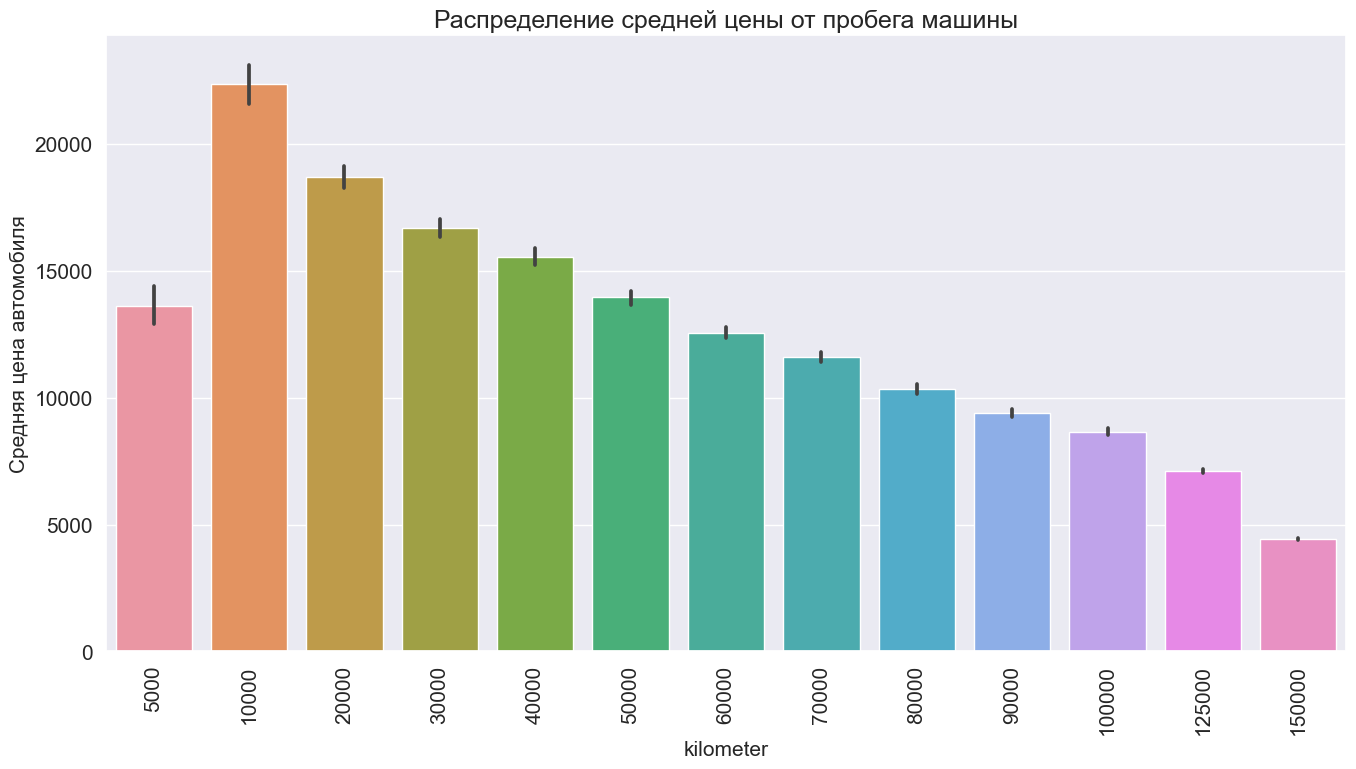

In [15]:
plt.figure(figsize=(16, 8))
sns.barplot(x=data.kilometer, y=data.price)

plt.title('Распределение средней цены от пробега машины', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,
           rotation=90)
plt.ylabel('Средняя цена автомобиля', fontsize=15)
plt.xlabel('kilometer', fontsize=15)
plt.show()

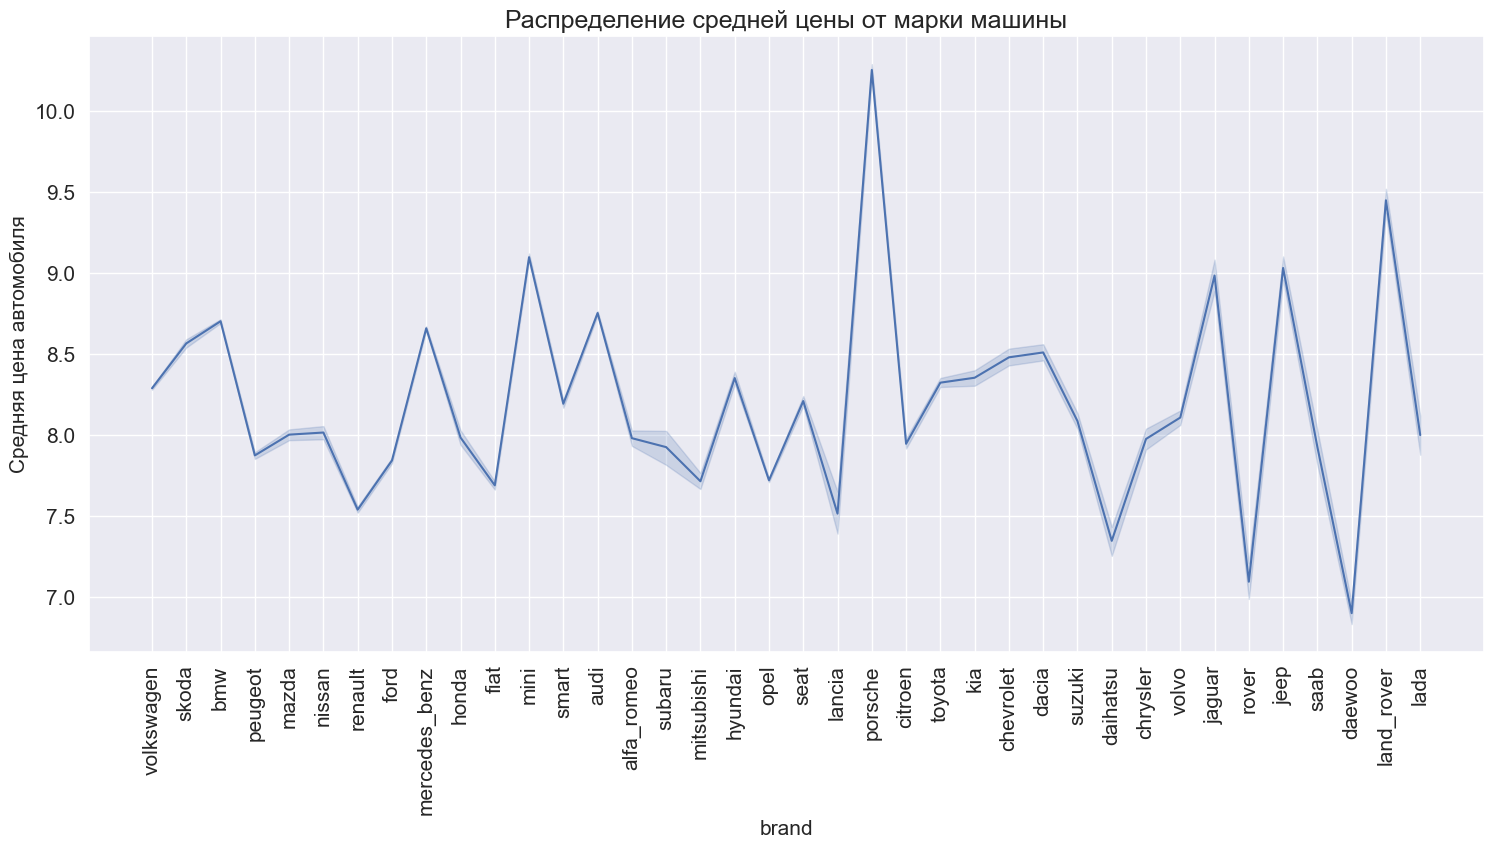

In [33]:
plt.figure(figsize=(18, 8))
sns.lineplot(x=data.brand, y=data.log_price)

plt.title('Распределение средней цены от марки машины', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,
           rotation=90)
plt.ylabel('Средняя цена автомобиля', fontsize=15)
plt.xlabel('brand', fontsize=15)
plt.show()

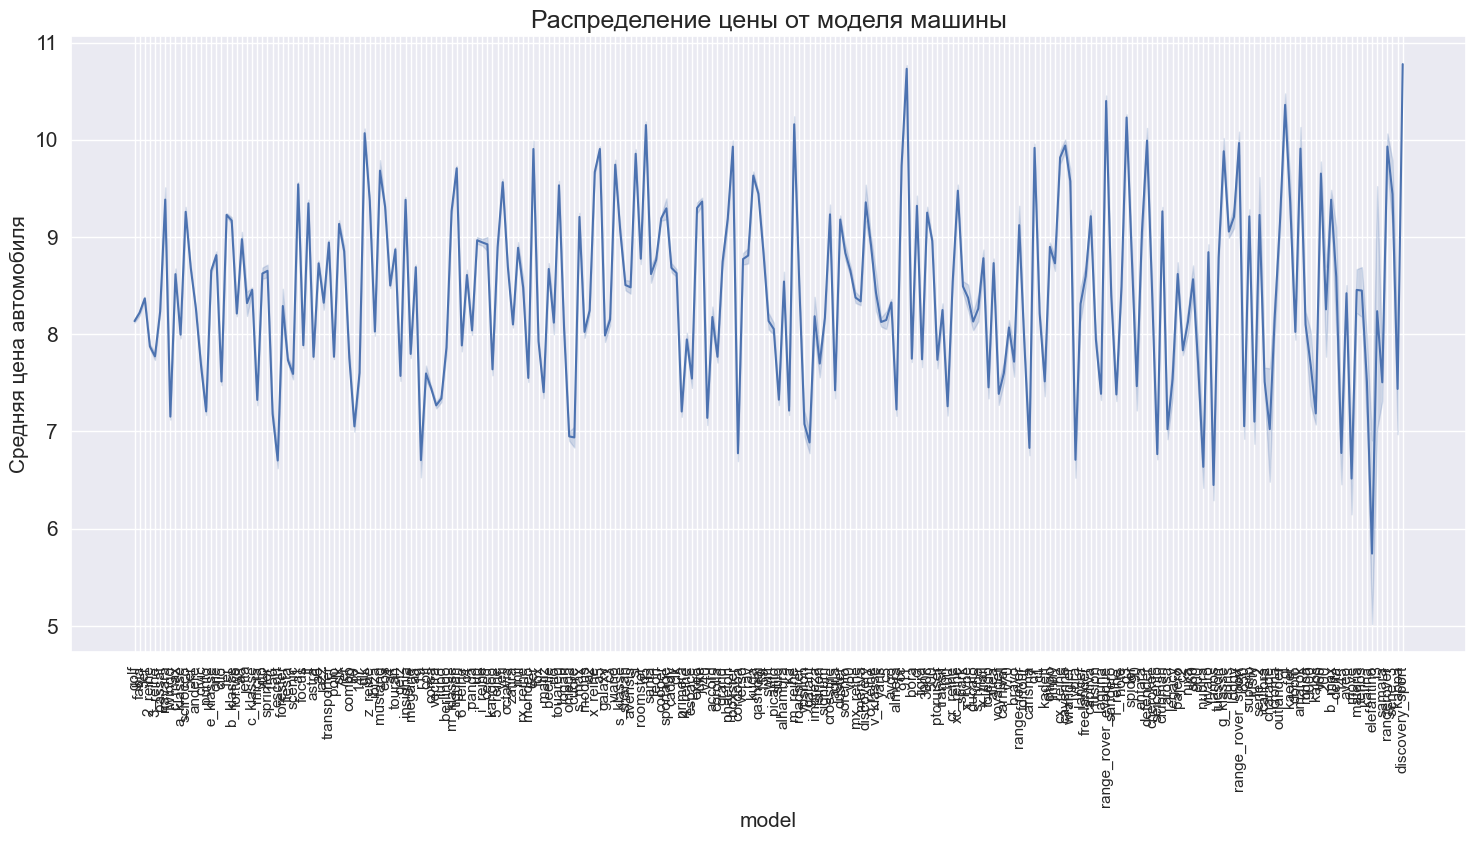

In [32]:
plt.figure(figsize=(18, 8))
sns.lineplot(x=data.model, y=data.log_price)

plt.title('Распределение цены от моделя машины', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Средняя цена автомобиля', fontsize=15)
plt.xlabel('model', fontsize=15)
plt.show()

In [29]:
data.loc[data.index, 'model_group'] = 0
data.loc[data.index, 'brand_group'] = 0

In [41]:
brand_borders = [0, 7.5, 8, 8.5, 9, 9.5, 10, 11]
model_borders = [5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11]

brands = data[['brand', 'log_price']]
brands = brands.groupby('brand').mean()

for i in range(len(brand_borders)-1):
    brand_names = brands[(brands['log_price'] >= brand_borders[i]) & (brands['log_price'] < brand_borders[i + 1])].index
    data.loc[data['brand'].isin(brand_names), 'brand_group'] = i

models = data[['model', 'log_price']]
models = models.groupby('model').mean()
for i in range(len(model_borders)-1):
    model_names = models[(models['log_price'] >= model_borders[i]) & (models['log_price'] < model_borders[i + 1])].index
    data.loc[data['model'].isin(model_names), 'model_group'] = i

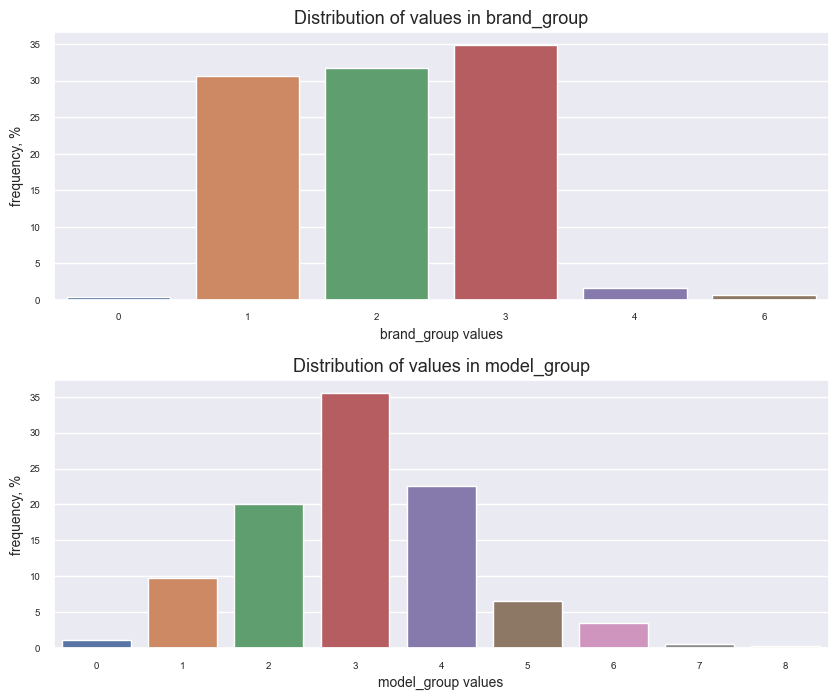

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3)

def add_countplot(label, ax):
    plot_df = data[label].value_counts(normalize=True) * 100
    sns.barplot(x=plot_df.index, y=plot_df.values, ax=ax)
    
    ax.tick_params(axis='both', labelsize=7)
    
    ax.set_title('Distribution of values in ' + label, fontsize=13)
    ax.set_xlabel(label + " values", fontsize=10)
    ax.set_ylabel("frequency, %", fontsize=10)

for i, label in enumerate(['brand_group', 'model_group']):
    add_countplot(label, axs[i])

plt.show()

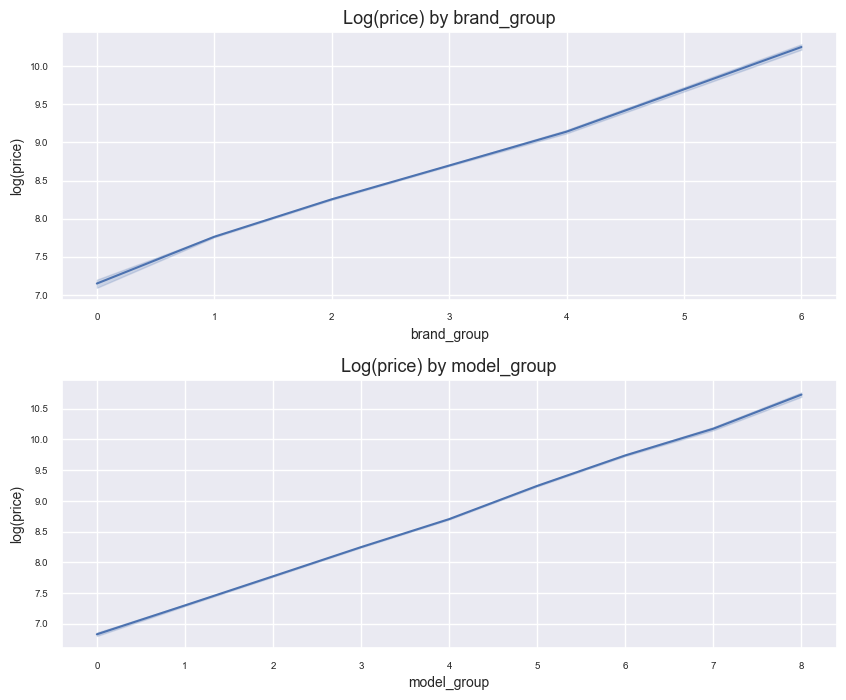

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.3)

def add_lineplot(label, ax):
    sns.lineplot(data, x=label, y='log_price', ax=ax)
    
    ax.tick_params(axis='both', labelsize=7)
    
    ax.set_title('Log(price) by ' + label, fontsize=13)
    ax.set_xlabel(label, fontsize=10)
    ax.set_ylabel("log(price)", fontsize=10)

for i, label in enumerate(['brand_group', 'model_group']):
    add_lineplot(label, axs[i])

plt.show()

In [43]:
# YOUR CODE (EDA):

In [44]:
categorical.extend(data.select_dtypes(include=[np.object_]).columns)
numeric.extend(data.select_dtypes(include=[np.number]).columns)
print(categorical)
print(numeric)

['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
['powerPS', 'kilometer', 'autoAgeMonths', 'price', 'bias', 'log_price', 'rare', 'transformed_age', 'model_group', 'brand_group']


In [65]:
categorical = ['vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'transformed_age', 'model_group', 'brand_group']
other = []
drop_cols = ['autoAgeMonths', 'brand', 'model']

In [66]:
data['bias'] = 1
other += ['bias']
x = None
x = data[categorical + numeric + other]
y = data['log_price']

In [68]:
# x.drop('bias', axis=1, inplace=True)
y

0          7.313887
1          8.188967
2          6.478510
3          7.696667
4          7.601402
            ...    
241185     8.974745
241186     8.071219
241187     7.090077
241188     9.127067
241189    10.274741
Name: log_price, Length: 240411, dtype: float64

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [70]:
y = y.values

In [71]:
# YOUR CODE (data split into train/val/test):

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [52]:
# YOUR CODE:

In [53]:
# X_train = np.array(X_train.todense())
# X_test = np.array(X_test.todense())
# X_val = np.array(X_val.todense())

AttributeError: 'numpy.ndarray' object has no attribute 'todense'

In [72]:
from sklearn.metrics import r2_score
import itertools
from tqdm import tqdm

In [73]:
X_train.shape

(194732, 25)

In [74]:
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.05456631,
        -0.10478797,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.72415507,
         0.98668033,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.05456631,
        -0.10478797,  1.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.05456631,
        -0.10478797,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., -0.83328768,
        -1.19625626,  1.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.05456631,
         0.98668033,  1.        ]])

In [75]:
def best_lambda(descent_names=['full'], lambdas=np.logspace(-3, 0.5)):
    dimension = X_train.shape[1]
    max_iter = 300
    best_lambdas = []
    
    for descent_name in descent_names:
        val_losses = []
        for lambda_ in lambdas:
            descent_config = {
                'descent_name': descent_name,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': lambda_,
                }
            }

            regression = LinearRegression(
                descent_config=descent_config,
                tolerance=0,
                max_iter=max_iter
            )

            regres = regression.fit(X_train, y_train)
            val_loss = regres.calc_loss(X_val, y_val)
            val_losses.append(val_loss)
            
        min_loss = min(val_losses)
        ind = val_losses.index(min_loss)
        best_lambdas.append(lambdas[ind])
        print(f"{descent_name} descent:")
        print(f"lambda: {best_lambdas[-1]}, val_loss: {min_loss}\n")
    return best_lambdas

In [76]:
best_lambdas = best_lambda(['full', 'stochastic', 'momentum', 'adam'])

full descent:
lambda: 1.9306977288832496, val_loss: 0.21717825676948052

stochastic descent:
lambda: 0.5179474679231207, val_loss: 0.22430035377653798

momentum descent:
lambda: 1.637893706954063, val_loss: 0.2161157578252141

adam descent:
lambda: 0.2682695795279725, val_loss: 0.21608466110453603



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [ ]:
# YOUR CODE:

In [79]:
histories_loss = {}
dimension = X_train.shape[1]
tolerance = 0

for name, lambda_ in tqdm(zip(['full', 'stochastic', 'momentum', 'adam'], [1.931, 0.518, 1.638, 0.268])):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': dimension,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance
    )
    
    regres = regression.fit(X_train, y_train)
    
    histories_loss[name] = regres.loss_history

4it [00:09,  2.26s/it]


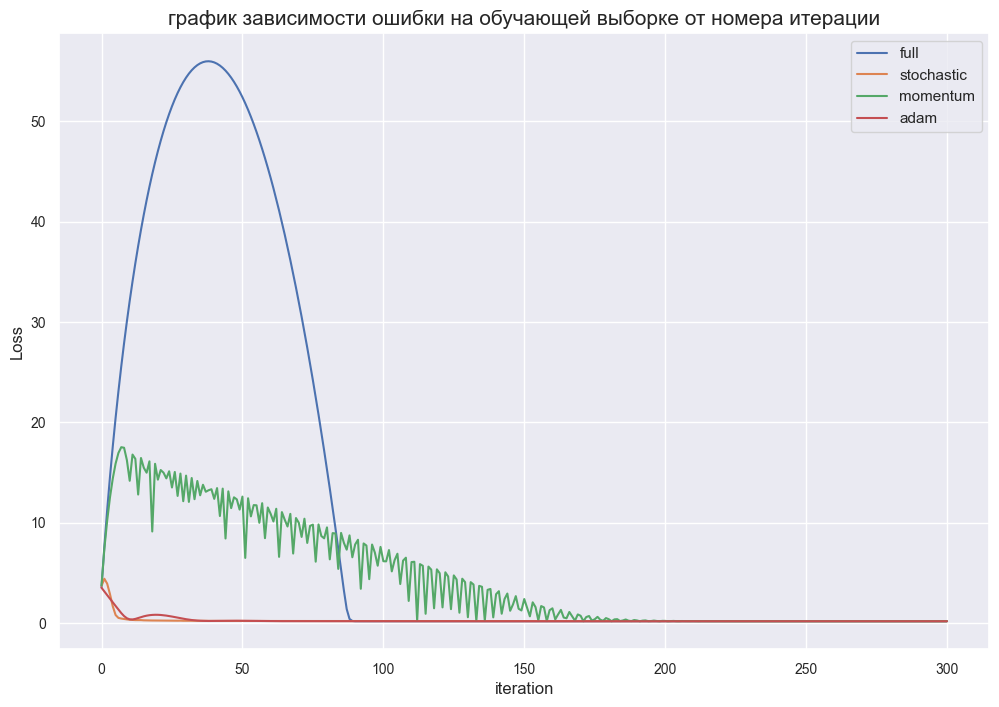

In [80]:
plt.figure(figsize=(12, 8))
for name in ['full', 'stochastic', 'momentum', 'adam']:
    sns.lineplot(np.log1p(histories_loss[name]), label=name)
plt.title('график зависимости ошибки на обучающей выборке от номера итерации', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('iteration', fontsize=12)
plt.show()

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [81]:
from datetime import datetime
import time
from collections import defaultdict


batch_sizes = np.arange(5, 500, 10)
k = 3
# YOUR CODE:

iterations = {}
times = defaultdict(list)
for batch_size in batch_sizes:
    last_iter = 0
    for _ in range(k):
        start_time = datetime.now()
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': dimension,
                'lambda_': 0.1,
                'batch_size': batch_size
            }
        }
        regression = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance
        )
        regres = regression.fit(X_train, y_train)
        last_iter += 300 - regres.max_iter
        
        print(batch_size, _)
    
    iterations[batch_size] = (last_iter/k)
    times[batch_size] = ((datetime.now() - start_time).seconds / k)

5 0
5 1
5 2
15 0
15 1
15 2
25 0
25 1
25 2
35 0
35 1
35 2
45 0
45 1
45 2
55 0
55 1
55 2
65 0
65 1
65 2
75 0
75 1
75 2
85 0
85 1
85 2
95 0
95 1
95 2
105 0
105 1
105 2
115 0
115 1
115 2
125 0
125 1
125 2
135 0
135 1
135 2
145 0
145 1
145 2
155 0
155 1
155 2
165 0
165 1
165 2
175 0
175 1
175 2
185 0
185 1
185 2
195 0
195 1
195 2
205 0
205 1
205 2
215 0
215 1
215 2
225 0
225 1
225 2
235 0
235 1
235 2
245 0
245 1
245 2
255 0
255 1
255 2
265 0
265 1
265 2
275 0
275 1
275 2
285 0
285 1
285 2
295 0
295 1
295 2
305 0
305 1
305 2
315 0
315 1
315 2
325 0
325 1
325 2
335 0
335 1
335 2
345 0
345 1
345 2
355 0
355 1
355 2
365 0
365 1
365 2
375 0
375 1
375 2
385 0
385 1
385 2
395 0
395 1
395 2
405 0
405 1
405 2
415 0
415 1
415 2
425 0
425 1
425 2
435 0
435 1
435 2
445 0
445 1
445 2
455 0
455 1
455 2
465 0
465 1
465 2
475 0
475 1
475 2
485 0
485 1
485 2
495 0
495 1
495 2


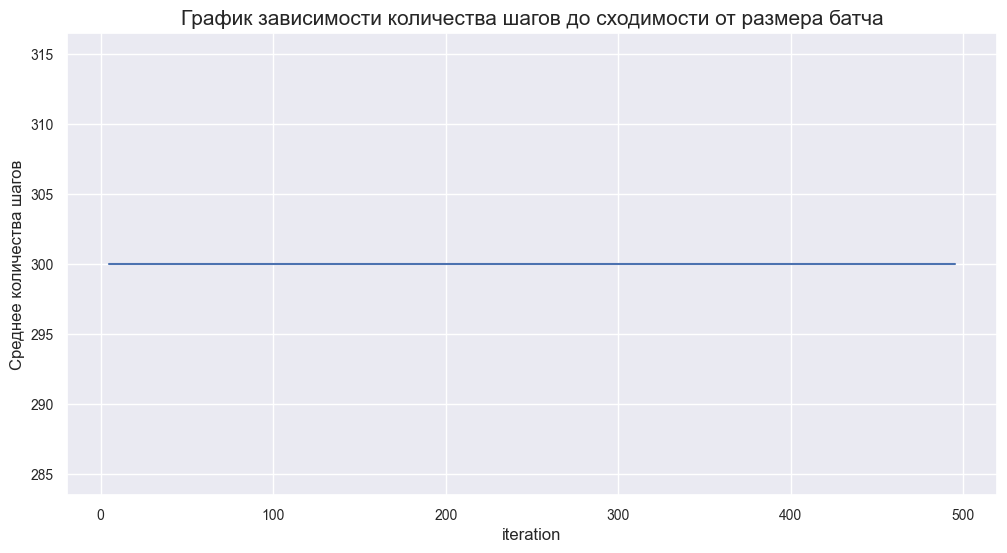

In [82]:
plt.figure(figsize=(12,6))

sns.lineplot(iterations)

plt.title('График зависимости количества шагов до сходимости от размера батча', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Среднее количества шагов', fontsize=12)
plt.xlabel('iteration', fontsize=12)
plt.show()

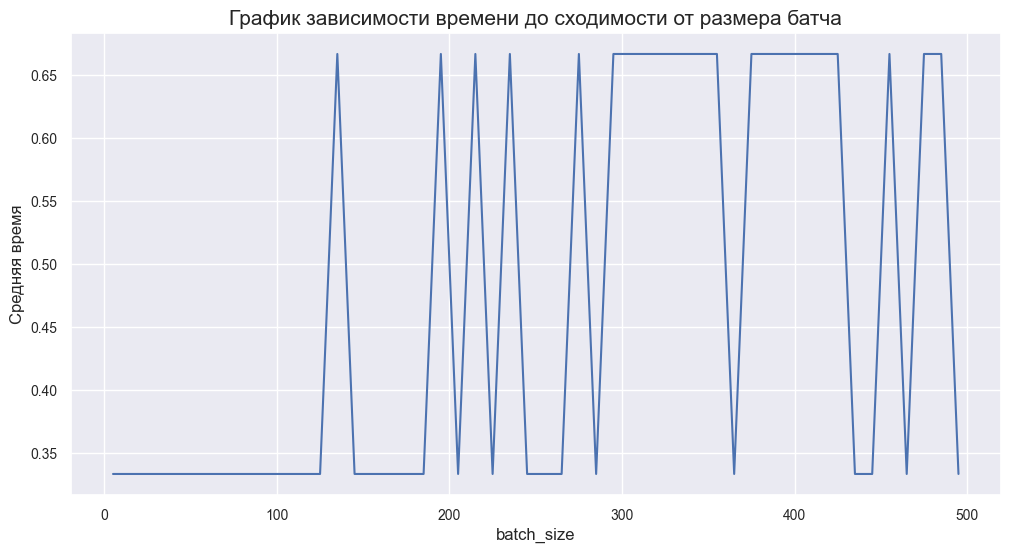

In [83]:
plt.figure(figsize=(12,6))

sns.lineplot(times)

plt.title('График зависимости времени до сходимости от размера батча', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel('Средняя время', fontsize=12)
plt.xlabel('batch_size', fontsize=12)
plt.show()

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE:

In [ ]:
dimension = X_train.shape[1]
compare_approach_l2_reg = pd.DataFrame(columns=['name', 'train_score', 'test_score', 'val_score', 'r_2', 'lambda', 'last_iter'])
counter = 0
for name, lambda_ in tqdm(itertools.product(['full', 'stochastic', 'momentum', 'adam'], np.logspace(-1, -6, 3))):
    descent_config = {
        'regularized': True,
        'descent_name': name,
        'kwargs': {
            'dimension': dimension,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance
    )

    regres = regression.fit(X_train, y_train)
    train_loss = regres.calc_loss(X_train, y_train)
    test_loss = regres.calc_loss(X_test, y_test)
    val_loss = regres.calc_loss(X_val, y_val)
    r2_score_valid = r2_score(y_val, regres.predict(X_val))
    last_iter = 300 - regres.max_iter
    
    compare_approach_l2_reg.loc[counter] = [name, train_loss, val_loss, test_loss, r2_score_valid, lambda_, last_iter]
    counter += 1

In [ ]:
compare_approach_l2_reg

In [ ]:
compare_approach

In [ ]:
histories_loss_l2_reg = {}

for name, lambda_ in tqdm(zip(['full', 'stochastic', 'momentum', 'adam'],[0.01, 0.01, 0.01, 0.01])):
    descent_config = {
        'regularized': True,
        'descent_name': name,
        'kwargs': {
            'dimension': dimension,
            'lambda_': lambda_
        }
    }

    regression = LinearRegression(descent_config=descent_config)
    
    regres = regression.fit(X_train, y_train)
    
    histories_loss_l2_reg[name] = regres.loss_history

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(histories_loss['stochastic'])
sns.lineplot(histories_loss_l2_reg['stochastic'])

In [ ]:
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension,
        'lambda_': .1,
        
    }
}

regression = LinearRegression(
    descent_config=descent_config,
)


In [ ]:
%%time
regres = regression.fit(X_train, y_train)

In [ ]:
len(regres.loss_history)

In [ ]:
regres.__getattribute__('max_iter')

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

In [ ]:
from descents import get_descent
from linear_regression import LinearRegression
from descents import LossFunction

dimension = X_train.shape[1]
max_iter = 300

# ['full', 'stochastic', 'momentum', 'adam'], [ 0.33, 0.5, 1.65, 4000] 

compare_approach = pd.DataFrame(columns=['name', 'train_score', 'test_score', 'val_score', 'r_2', 'lambda', 'last_iter'])
counter = 0
for name, lambda_ in tqdm(itertools.product(['full'], np.arange(0.26, .34, .01))):
    descent_config = {
        'descent_name': name,
        'kwargs': {
            'dimension': dimension,
            'lambda_': lambda_,
            'loss_function': LossFunction.LogCosh
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        tolerance=0,
        max_iter=max_iter
    )

    regres = regression.fit(X_train, y_train)
    train_loss = regres.calc_loss(X_train, y_train)
    test_loss = regres.calc_loss(X_test, y_test)
    val_loss = regres.calc_loss(X_val, y_val)
    r2_score_valid = r2_score(y_val, regres.predict(X_val))
    last_iter = max_iter - regres.max_iter
    
    compare_approach.loc[counter] = [name, train_loss, val_loss, test_loss, r2_score_valid, lambda_, last_iter]
    counter += 1

In [ ]:
compare_approach

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: